<a href="https://colab.research.google.com/github/chandra-prakash-94/ML_assignment/blob/main/Linear_Reg_GD_and_NE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependencies**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Data Collection and Processing**

In [13]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine_Learning/Assignments_ML/Housepriceprediction.csv')
df.head()

,Id,LotArea,OverallQual,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,1,8450,7,856,1710,8,2,548,208500
1,2,9600,6,1262,1262,6,2,460,181500
2,3,11250,7,920,1786,6,2,608,223500
3,4,9550,7,961,1717,7,3,642,140000
4,5,14260,8,1145,2198,9,3,836,250000


In [14]:
# number of rows and Columns in our data set
df.shape

(1460, 9)

In [ ]:
# getting some informations about the data
df.info()

In [ ]:
# check the number of missing values in each column
df.isnull().sum()

**Separating features & Target**

**Preprocessing/Scaling: Since our columns are on different sacle it is important to perform scaling on them**

In [17]:
X = df.drop(columns =['Id'], axis=1)

In [18]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(X.drop('SalePrice',axis='columns'))
scaled_Y = sy.fit_transform(df['SalePrice'].values.reshape(df.shape[0],1))



In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X ,scaled_Y,test_size=0.3) 

**Lets run linear regression model now**

In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

In [24]:
clf.coef_

array([[ 0.19455246,  0.31301796,  0.20990206,  0.32923797, -0.01900846,
         0.04136897,  0.0785046 ]])

In [25]:
clf.intercept_

array([-0.13318807])

In [26]:
clf.score(X_test, y_test)

0.6825711114388786

**Using Normal Equation**

In [28]:
scaled_X.shape

(1460, 7)

In [ ]:
X_b = np.c_[np.ones((1460,1)), scaled_X]
X_b

In [30]:
beta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T.dot(scaled_Y ))
beta

array([[-0.13118334],
       [ 0.18351109],
       [ 0.33025207],
       [ 0.1710215 ],
       [ 0.30395642],
       [-0.01831149],
       [ 0.07561328],
       [ 0.03674188]])

**Batch gradient descent**

We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D

In [31]:
scaled_Y.shape

(1460, 1)

In [32]:
scaled_Y.reshape(1460,)

array([0.24107763, 0.20358284, 0.26190807, ..., 0.321622  , 0.14890293,
       0.15636717])

Now is the time to implement mini batch gradient descent.

In [33]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),500)
w, b, cost

(array([0.92119788, 0.31119481, 0.69451826, 0.62552721, 0.46314486,
        0.27994837, 0.43159185]), -0.7515368196446485, 0.0431456736242263)

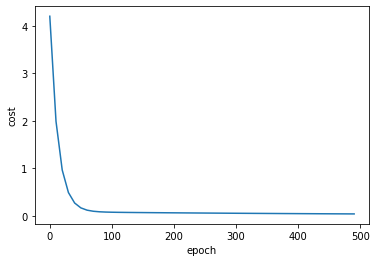

In [34]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)